___
# Atividade: Variáveis qualitativas com a PNAD (ALUNOS)
___

## Aula 02


**Link úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html
4.  Estude a aula `Aula02 Análise Exploratoria Variáveis Qualitativas-ALUNOS.ipynb`, o qual contém uma introdução ao Jupyter Notebook. A publicação dessa aula tem como objetivo auxiliá-lo, caso queira, no desenvolvimento dos seus próximos programas, como esta atividade.

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).
2.  Trabalhar com a base de dados da PNAD 2013 - Pesquisa Nacional por Amostra de Domicílios

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


___
## <font color='blue'>PNAD 2013 – PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS</font>

**Base de dados reduzida: ** `pes2013A.txt` (75 MB)
[Acesse a base de dados aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/pes2013A.txt] 

**Dicionário das variáveis: ** `Dicionário de variáveis de pessoas - PNAD 2013.xlsx`
[Acesse dicionário aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/Dicion%C3%A1rio%20de%20vari%C3%A1veis%20de%20pessoas%20-%20PNAD%202013.xls]


Muitos especialistas na área de negócios dizem que empresários mais bem sucedidos são aqueles que fazem um planejamento antes de começar seu próprio negócio. Nessa visão, imagine que o Sr. Gold tenha como grande objetivo abrir uma nova faculdade e para isso deseja estudar o perfil do estudante que cursa ensino médio ou pré-vestibular e do que cursa ensino superior. 

Assuma que as variáveis de interesse a respeito dos estudantes sejam relativamente as mesmas de 2013 até o momento atual. Nesse caso, seja criativo para ajudar o Sr. Gold que deseja abrir seu negócio, mas não tem certeza sobre quais variáveis o interessam. 

Vocês podem ajudá-lo?!  

As variáveis a seguir devem fazer parte da sua análise:

* V0302: sexo
* V0404: cor ou raça
* V6002: rede de ensino
* V4802: nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)

** Crie uma variável com região do indivíduo amostrado considerando a variável `UF` que define o estado e também trabalhe com essa nova variável em suas análises. ** 

** Escolha mais pelo menos DUAS variáveis qualitativas para completar sua análise!! **

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo do Sr. Gold.

Sua análise deve conter pelo menos uma das seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) com as frequências relativas cadas categorias das variáveis qualitativas.
2. Tabela cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".


___


<font color='red'>
Crie um repositório chamado CD em seu Github
</font>


Neste repositório, salve seu trabalho numa pasta chamada aula2

Por exemplo, se seu login for *pikachu* o projeto vai estar na pasta:

https://github.com/<font color=red>pikachu/CD/aula2</font>



## <font color='red'>Terça-feira (dia 16/08), no horário de atendimento da sua turma, deverá apresentar aos NINJAS!!</font>
___

In [77]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange

In [78]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [79]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\MLUQUES\Documents\Insper\Semestre 2\Ciência dos Dados\Aula 2\CD\aula2


In [80]:
dados = pd.read_table('pes2013A.txt', encoding='windows-1252', sep=' ')
dados.shape

(362555, 72)

In [81]:
estados = dados.UF
genero = dados.V0302
cor = dados.V0404
rede_ensino = dados.V6002
nivel_ensino = dados.V4802
alfab = dados.V0601
trabalho = dados.V9001
aux_edu = dados.V9046
anos_estudo = dados.V4803

n=dados.shape[0]

In [82]:
'''Especificando o tipo de variável'''

#qualitativas

genero = genero.astype('category')
estados = estados.astype('category')
cor = cor.astype('category')
rede_ensino = rede_ensino.astype('category')
nivel_ensino = nivel_ensino.astype('category')
alfab = alfab.astype('category')
trabalho = trabalho.astype('category')
aux_edu = aux_edu.astype('category')
anos_estudo = anos_estudo.astype('category')


In [83]:
'''Separando por região'''

dados.Reg = dados.UF


dados.Reg[(dados.UF>=31) & (dados.UF<36)] = 1
dados.Reg[(dados.UF>=11)&(dados.UF<18)] = 2
dados.Reg[(dados.UF>=41)&(dados.UF<44)] = 3
dados.Reg[(dados.UF>=50)&(dados.UF<54)] = 4
dados.Reg[(dados.UF>=21)&(dados.UF<30)] = 5

dados.Reg = dados.Reg.astype('category')

regioes = dados.Reg
regioes.cat.categories = ('Sudeste','Norte','Sul','Centro-Oeste','Nordeste')

C:\Users\MLUQUES\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\MLUQUES\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\MLUQUES\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\MLUQUES\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [84]:
'''Definindo os nomes das variavies'''

genero.cat.categories=('Masculino', 'Feminino')
estados.cat.categories = ('Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí',
                           'Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais',
                           'Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul',
                           'Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal')
cor.cat.categories = ('Indígena','Branca','Preta','Amarela','Parda','Sem declaração')
nivel_ensino.cat.categories = ('Maternal, jardim de infância','Classe de alfabetização','Alfabetização de adultos',
                               '1ª a 4ª séries (EF em 8 anos)','5ª a 8ª série (EF em 8 anos)','1ª série (EF em 9 anos)',
                               '2ª a 5ª série (EF em 9 anos)','6ª a 9ª série (EF em 9 anos)',
                               'Educação de jovens e adultos (não seriado do EF)', 'Ensino Médio (pré-vestibular incluso)',
                               'Ensino Superior (mestrado e doutorado)')
rede_ensino.cat.categories = ('Pública', 'Privada')
alfab.cat.categories = ('Sabe ler e escrever', 'Não sabe ler e/ou escrever')
trabalho.cat.categories = ('Trabalhou na semana da pesquisa','Não trabalhou na semana da pesquisa')
aux_edu.cat.categories = ('Recebeu auxílio educação no mês de referência','Não recebeu auxílio educação no mês de referência')
anos_estudo.cat.categories = ('Sem instrução/menos de 1 ano','1 ano','2 anos','3 anos','4 anos','5 anos','6 anos','7 anos',
                              '8 anos', '9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais',
                              'Não determinado')

In [85]:
'''Calculando frequencias relativas'''

fr_genero = (genero.value_counts()/n*100).round(decimals=1)
fr_estados = (estados.value_counts()/n*100).round(decimals=1)
fr_cor = (cor.value_counts()/n*100).round(decimals=1)
fr_nivel_ensino = (nivel_ensino.value_counts()/n*100).round(decimals=1)
fr_rede_ensino = (rede_ensino.value_counts()/n*100).round(decimals=1)
fr_regioes = (dados.Reg.value_counts()/n*100).round(decimals=1)
fr_alfab = (alfab.value_counts()/n*100).round(decimals=1)
fr_trabalho = (trabalho.value_counts()/n*100).round(decimals=1)
fr_aux_edu = (aux_edu.value_counts()/n*100).round(decimals=1)
fr_anos_estudo = (anos_estudo.value_counts()/n*100).round(decimals=1)

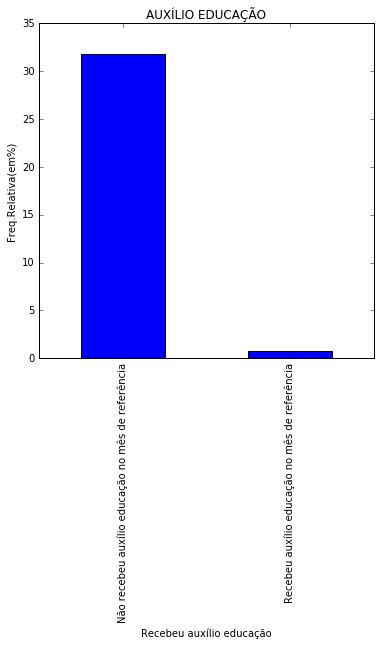

In [86]:
'''gráfico barras fr auxilio educação'''
plot = fr_aux_edu.plot(kind='bar',title='AUXÍLIO EDUCAÇÃO', figsize=(6,6))
plt.ylabel('Freq.Relativa(em%)')
plt.xlabel('Recebeu auxílio educação')
plt.show()

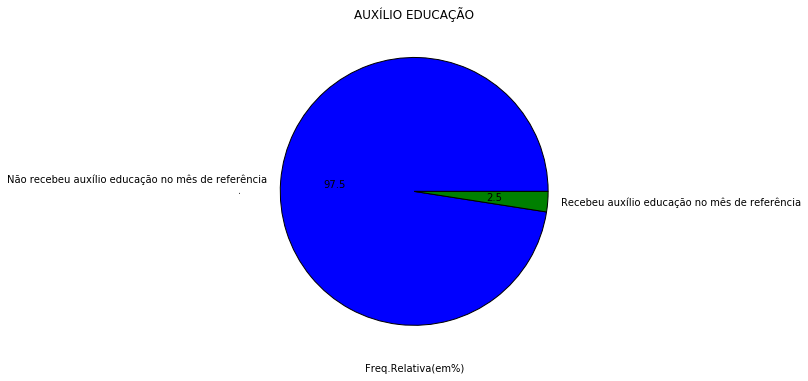

In [87]:
'''gráfico pizza fr auxilio educação'''
plot = fr_aux_edu.plot(kind='pie',title='AUXÍLIO EDUCAÇÃO',autopct='%.1f',figsize=(6,6))
plt.xlabel('Freq.Relativa(em%)')
plt.ylabel('.')
plt.show()

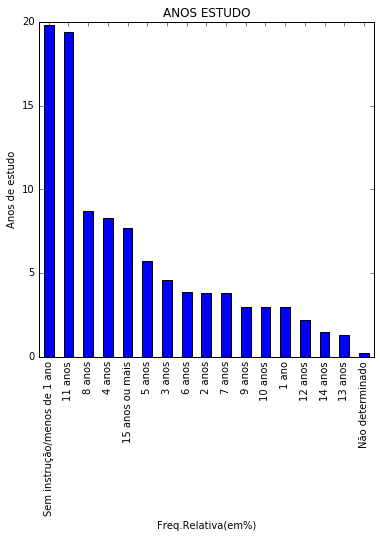

In [88]:
'''gráfico barras fr anos estudo'''
plot = fr_anos_estudo.plot(kind='bar',title='ANOS ESTUDO',figsize=(6,6))
plt.xlabel('Freq.Relativa(em%)')
plt.ylabel('Anos de estudo')
plt.show()

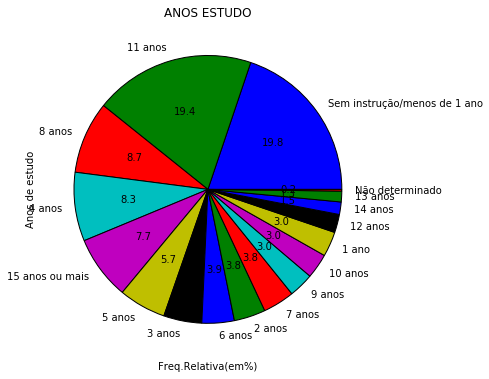

In [89]:
'''gráfico pizza fr anos estudo'''
plot = fr_anos_estudo.plot(kind='pie',title='ANOS ESTUDO',autopct='%.1f',figsize=(6,6))
plt.xlabel('Freq.Relativa(em%)')
plt.ylabel('Anos de estudo')
plt.show()

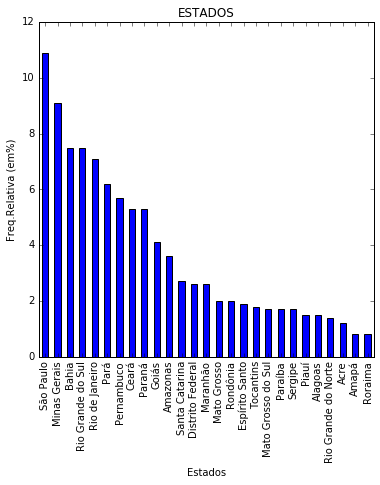

In [90]:
'''gráfico barras fr estados'''
plot = fr_estados.plot(kind='bar', title='ESTADOS', figsize=(6,6))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Estados')
plt.show()

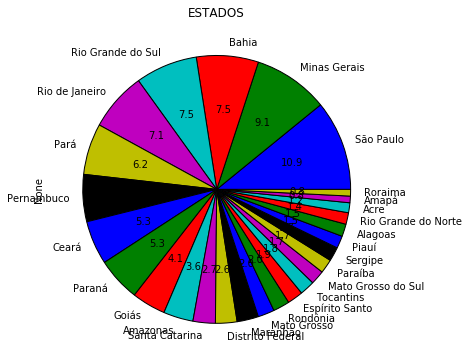

In [91]:
'''gráfico pizza fr estados'''
plot = fr_estados.plot(kind='pie',title='ESTADOS',autopct='%.1f',figsize=(6, 6))
plt.show()

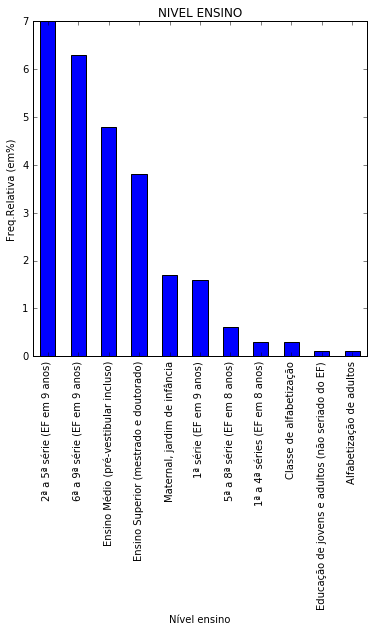

In [92]:
'''gráfico barras fr nivel ensino'''
plot = fr_nivel_ensino.plot(kind='bar',title='NIVEL ENSINO',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Nível ensino')
plt.show()

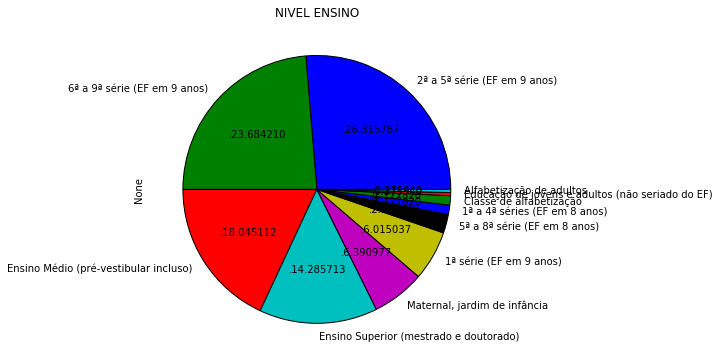

In [93]:
'''gráfico pizza fr nivel ensino'''
plot = fr_nivel_ensino.plot(kind='pie',title='NIVEL ENSINO',autopct='.%1f', figsize=(6,6))
plt.show()

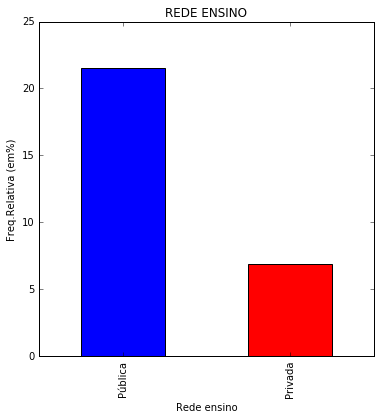

In [94]:
'''gráfico barras fr rede ensino'''
plot = fr_rede_ensino.plot(kind='bar',title='REDE ENSINO',figsize=(6, 6), color=('b','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Rede ensino')
plt.show()

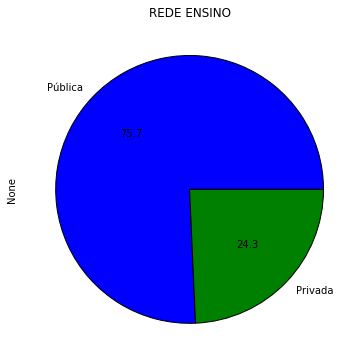

In [95]:
'''gráfico pizza fr rede ensino'''
plot = fr_rede_ensino.plot(kind='pie', title='REDE ENSINO',autopct='%.1f', figsize=(6,6))
plt.show()

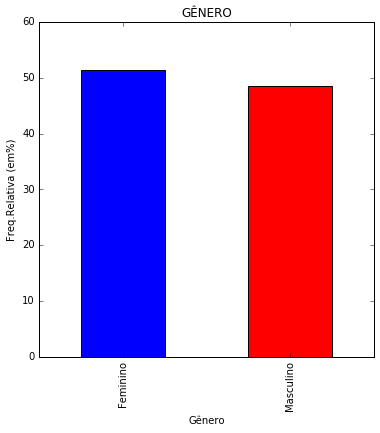

In [96]:
'''Gráfico barras fr genero'''
plot = fr_genero.plot(kind='bar',title='GÊNERO',figsize=(6, 6),color=('b','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Gênero')
plt.show()

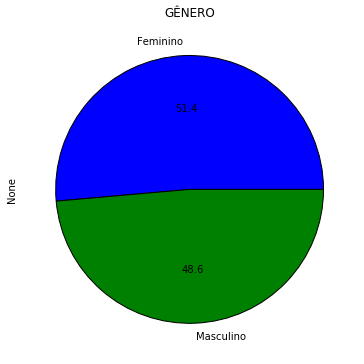

In [97]:
'''Gráfico pizza fr genero'''
plot = fr_genero.plot(kind='pie',title='GÊNERO',autopct='%.1f',figsize=(6, 6))
plt.show()

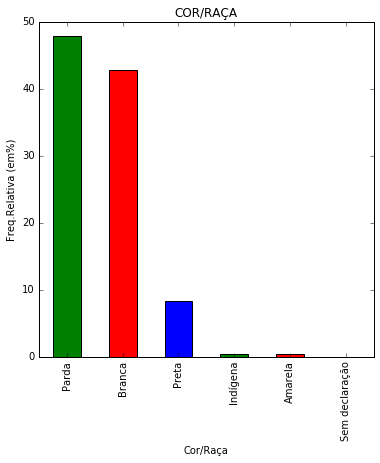

In [98]:
'''gráfico barras fr cor'''
plot = fr_cor.plot(kind='bar',title='COR/RAÇA',figsize=(6, 6),color=('g','r','b'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Cor/Raça')
plt.show()

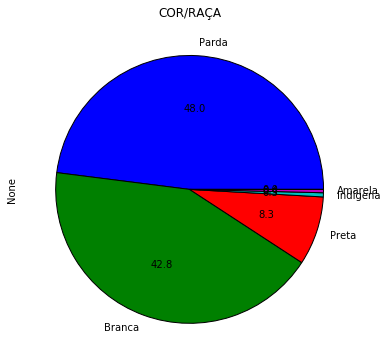

In [99]:
'''gráfico pizza fr cor'''
plot = fr_cor.plot(kind='pie',title='COR/RAÇA',autopct='%.1f',figsize=(6, 6))
plt.show()

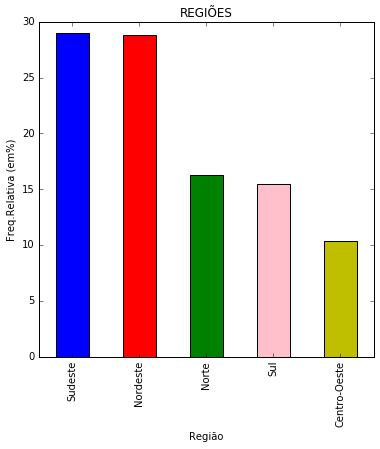

In [100]:
'''gráfico barras fr regioes'''
plot = fr_regioes.plot(kind='bar',title='REGIÕES',figsize=(6, 6), color=('b','r','g','pink','y'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Região')
plt.show()

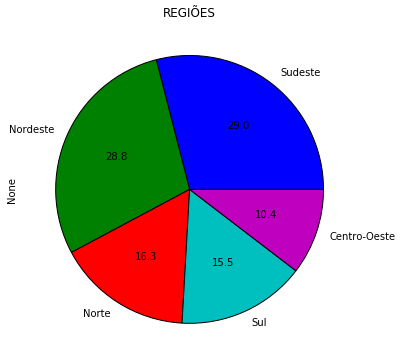

In [101]:
'''gráfico pizza fr regioes'''
plot = fr_regioes.plot(kind='pie',title='REGIÕES',autopct='%.1f',figsize=(6, 6))
plt.show()

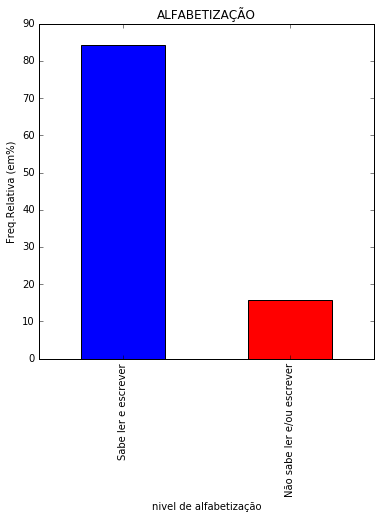

In [102]:
'''grafico barra fr alfab'''
plot =fr_alfab.plot(kind='bar', title='ALFABETIZAÇÃO',figsize=(6,6), color = ('b','r'))
plt.xlabel('nivel de alfabetização')
plt.ylabel('Freq.Relativa (em%)')
plt.show()

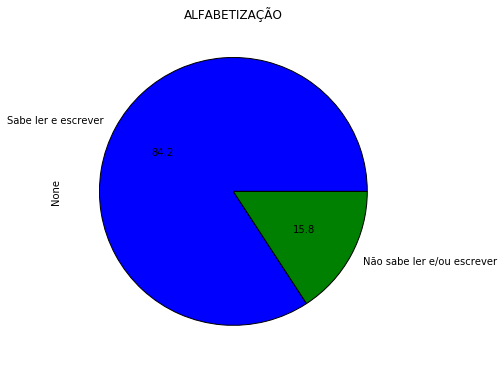

In [103]:
'''gráfico pizza fr alfab'''
plot = fr_alfab.plot(kind='pie',title='ALFABETIZAÇÃO' ,autopct='%.1f',figsize=(6, 6))
plt.show()

In [104]:
print('Distribuição de nivel de alfabetização por região (em %):')
ct2=pd.crosstab(regioes,alfab,margins=True,rownames=['REGIÕES'], colnames=['ALFABETIZADO']).apply(percConvert, axis=0)
ct2

Distribuição de nivel de alfabetização por região (em %):


ALFABETIZADO,Sabe ler e escrever,Não sabe ler e/ou escrever,All
REGIÕES,,,
Sudeste,30,21,29
Norte,16,19,16
Sul,16,11,15
Centro-Oeste,11,9,10
Nordeste,27,39,29
All,100,100,100


In [105]:
print('Distribuição de nivel de ensino por região (em %):')
ct2=pd.crosstab(regioes,nivel_ensino,margins=True,rownames=['REGIÕES'], colnames=['NIVEL DE ENSINO']).apply(percConvert, axis=0)
ct2

Distribuição de nivel de ensino por região (em %):


NIVEL DE ENSINO,"Maternal, jardim de infância",Classe de alfabetização,Alfabetização de adultos,1ª a 4ª séries (EF em 8 anos),5ª a 8ª série (EF em 8 anos),1ª série (EF em 9 anos),2ª a 5ª série (EF em 9 anos),6ª a 9ª série (EF em 9 anos),Educação de jovens e adultos (não seriado do EF),Ensino Médio (pré-vestibular incluso),Ensino Superior (mestrado e doutorado),All
REGIÕES,,,,,,,,,,,,
Sudeste,26,26,19,17,20,27,24,27,12,27,28,29
Norte,18,22,11,27,21,20,22,19,28,19,15,16
Sul,11,6,12,15,33,13,13,11,14,14,18,15
Centro-Oeste,10,11,6,7,5,10,10,10,8,10,14,10
Nordeste,35,35,52,34,21,30,32,32,38,29,25,29
All,100,100,100,100,100,100,100,100,100,100,100,100


In [106]:
print('Distribuição de nivel de ensino por rede de ensino (em %):')
ct2=pd.crosstab(rede_ensino,nivel_ensino,margins=True,rownames=['REDE DE ENSINO'], colnames=['''
                NIVEL DE ENSINO''']).apply(percConvert, axis=0)
ct2

Distribuição de nivel de ensino por rede de ensino (em %):


NIVEL DE ENSINO,"Maternal, jardim de infância",Classe de alfabetização,Alfabetização de adultos,1ª a 4ª séries (EF em 8 anos),5ª a 8ª série (EF em 8 anos),1ª série (EF em 9 anos),2ª a 5ª série (EF em 9 anos),6ª a 9ª série (EF em 9 anos),Educação de jovens e adultos (não seriado do EF),Ensino Médio (pré-vestibular incluso),Ensino Superior (mestrado e doutorado),All
REDE DE ENSINO,,,,,,,,,,,,
Pública,71,73,95,91,94,82,85,86,96,86,27,22
Privada,29,27,5,9,6,18,15,14,4,14,73,7
All,100,100,100,100,100,100,100,100,100,100,100,100


## CONCLUSÃO 1:

### Os Estados que possuem mais alunos no Ensino Médio (Sudeste e Nordeste) são os mais viáveis para que seja construida uma universidade, considerando que em questão de anos estes serão os candidatos. Porém, como na região Nordeste, há um número maior de pessoas que nao sabem ler e/ou escrever, a região Sudeste acaba se mostrando a melhor opção para o Sr. Gold.

In [107]:
'''Variáveis quantitativas'''
idade = dados.V8005
idade_dados = idade.describe()
idade_dados

renda = dados.V4720

In [108]:
faixai = arange(0,110,5)
idade.describe()

count    362555.000000
mean         33.049813
std          20.870874
min           0.000000
25%          16.000000
50%          31.000000
75%          48.000000
max         109.000000
Name: V8005, dtype: float64

In [109]:
renda.describe()

count    3.105190e+05
mean     2.291647e+10
std      1.496375e+11
min      0.000000e+00
25%      0.000000e+00
50%      6.780000e+02
75%      1.300000e+03
max      1.000000e+12
Name: V4720, dtype: float64

In [110]:
idade_var = pd.cut(idade, faixai)
fr_idade_var = (idade_var.value_counts()/n*100).round(decimals=1)

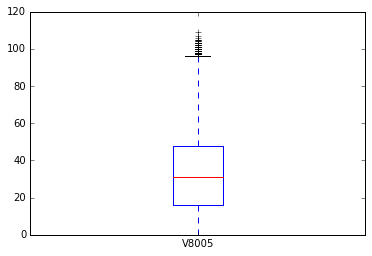

In [111]:
'''Gráfico box idades'''
plot = idade.plot(kind='box')
plt.show()

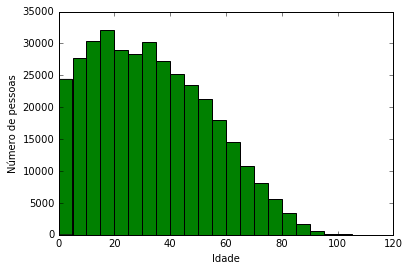

In [112]:
'''Histograma idades'''

idade.value_counts()
idade.plot.hist(bins=faixai,color='g')
plt.xlabel('Idade')
plt.ylabel('Número de pessoas')
plt.show()

In [127]:
'''Tabela Idade por Região'''

print('Idade por Regiões:')
ct2=pd.crosstab(idade_var,regioes,margins=True,rownames=['IDADE'], colnames=['REGIOES'])
ct2
#ct2.plot(kind='box', figsize =(10,10))

Idade por Regiões:


REGIOES,Sudeste,Norte,Sul,Centro-Oeste,Nordeste,All
IDADE,,,,,,
"(0, 5]",6379,5013,3405,2543,7451,24791
"(5, 10]",7148,5776,3726,2810,8611,28071
"(10, 15]",8237,6132,4362,3136,9551,31418
"(15, 20]",8452,5859,4482,3285,9537,31615
"(20, 25]",7993,5061,4191,3077,8473,28795
"(25, 30]",8347,4833,4178,3161,8485,29004
"(30, 35]",8711,4786,4400,3337,8510,29744
"(35, 40]",7917,4278,4061,2985,7534,26775
"(40, 45]",7278,3666,4074,2635,6914,24567


In [139]:
'''Tabela Idade por nível de ensino'''

print('Idade por nível de ensino:')
ct2=pd.crosstab(idade_var,nivel_ensino[5:],margins=True,rownames=['IDADE'], colnames=['NIVEL DE ENSINO'])
ct2

Idade por nível de ensino:


NIVEL DE ENSINO,"Maternal, jardim de infância",Classe de alfabetização,Alfabetização de adultos,1ª a 4ª séries (EF em 8 anos),5ª a 8ª série (EF em 8 anos),1ª série (EF em 9 anos),2ª a 5ª série (EF em 9 anos),6ª a 9ª série (EF em 9 anos),Educação de jovens e adultos (não seriado do EF),Ensino Médio (pré-vestibular incluso),Ensino Superior (mestrado e doutorado),All
IDADE,,,,,,,,,,,,
"(0, 5]",4585,402,0,10,0,555,80,0,0,0,0,24791
"(5, 10]",1708,653,0,432,36,4993,19219,579,0,0,0,28071
"(10, 15]",0,18,12,155,1224,83,5709,19626,34,3559,0,31418
"(15, 20]",0,0,35,78,451,19,273,2487,124,11514,3117,31615
"(20, 25]",0,0,27,27,95,6,33,159,33,1033,4687,28795
"(25, 30]",0,0,38,46,70,8,21,43,50,427,2277,29004
"(30, 35]",0,0,37,57,74,5,17,34,51,301,1483,29744
"(35, 40]",0,0,34,70,77,6,14,21,49,219,927,26775
"(40, 45]",0,0,30,53,38,0,9,10,49,156,551,24567


# Conclusão 2:

### Analisando os dados quantitativos de idade, temos que a faixa etária desejável (com ensino médio completo) se encontra entre 15 e 20 anos, dentro da qual se econtram pessoas com nível de ensino médio. Esta faixa de idade encontra-se principalmente nas regiões Sudeste e Nordeste.

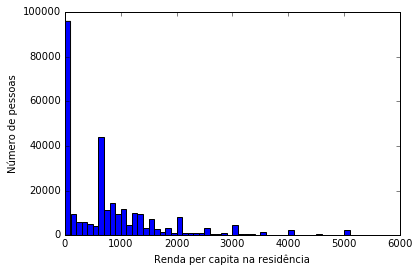

In [115]:
'''Histograma renda por número de pessoas até 6000 reais'''

renda.describe()
faixar = arange(0,6000,100)
renda.plot.hist(bins=faixar, color='b')
plt.ylabel('Número de pessoas')
plt.xlabel('Renda per capita na residência')
plt.show()

In [116]:
faixar = arange(0,5500,500)
renda_var = pd.cut(renda, faixar)
renda_var.value_counts()

dados.renda1 = renda
renda1 = dados.renda1[(renda>=0)&(renda<=6000)]
renda1.describe()

count    296947.000000
mean        844.153388
std        1037.810574
min           0.000000
25%           0.000000
50%         678.000000
75%        1200.000000
max        6000.000000
Name: V4720, dtype: float64

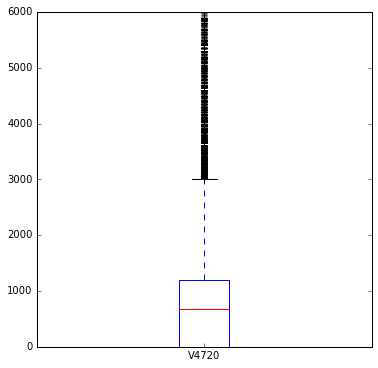

In [117]:
'''Boxplot da renda até 6000 reais'''
renda1.plot(kind='box', figsize=(6,6))
plt.show()

In [118]:
ct2=pd.crosstab(renda_var,regioes,margins=True,rownames=['RENDA POR FAIXA'], colnames=['REGIÂO'])

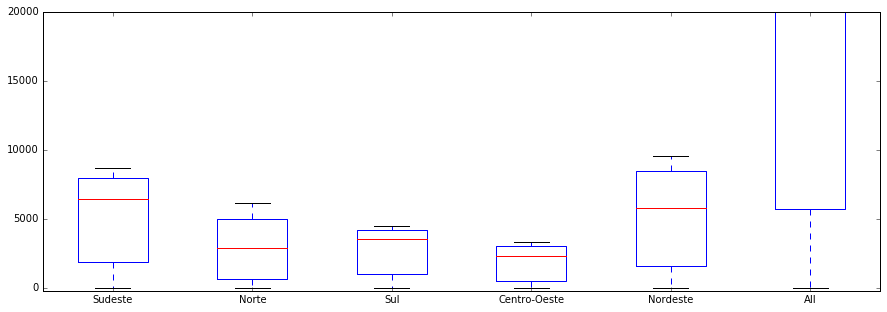

In [134]:
'''Boxplot Renda por região'''
ct2.plot(kind='box',figsize=(15,5))
axes=plt.gca()
axes.set_ylim([-200,20000])
plt.show()

In [120]:
'''Tabela Renda(por faixa) por região'''
ct2

REGIÂO,Sudeste,Norte,Sul,Centro-Oeste,Nordeste,All
RENDA POR FAIXA,,,,,,
"(0, 500]",5602,6803,2672,2181,16020,33278
"(500, 1000]",25581,13649,13654,8860,28034,89778
"(1000, 1500]",12982,4562,7969,4300,6911,36724
"(1500, 2000]",6303,1900,3913,2116,2605,16837
"(2000, 2500]",3141,965,1927,975,1372,8380
"(2500, 3000]",2609,848,1627,914,1141,7139
"(3000, 3500]",1086,399,719,378,544,3126
"(3500, 4000]",1178,367,742,496,540,3323
"(4000, 4500]",457,162,320,175,233,1347


# Conclusão 3:

### Com a análise dos dados de renda, podemos adicionar às conclusões previamente apresentadas que a melhor opção do Sr. Gold seria abrir uma faculdade pública, devido à maior possibilidade de locais para que ela seja instalada, por causa da concentração de renda em niveis mais baixos.
### Caso o Sr. Gold queira abrir uma faculdade privada, sua melhor opção, dentro das regiões previamente mencionadas, seria no Sudeste, devido à uma renda per capita espalhada por niveis maiores.

# CONCLUSÃO FINAL:

## A melhor opção para o Sr. Gold é abrir uma faculdade no Sudeste ou Nordeste, de preferência no primeiro caso esta seja de natureza privada.